# Predicting what the Customer Organization order

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.model_selection import GridSearchCV

import requests
import bs4
from bs4 import BeautifulSoup


import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## Load and understand the data

In [2]:
df = pd.read_csv("C:/Users/cvmda/code/data/ds/manu_demand_forecast/Customer_order_prediction_data.csv")
df.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,20220101,43012,SR02,756141537,"954,61",20220113,EUR,NaN,12311807
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,20220101,43114,NR03,798847812,"787,36",20220111,EUR,NaN,12311807
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,20220101,110019,NR01,960984659,"67493,46",20220112,EUR,93.0,12118758
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,20220101,153013,SR02,925857642,"1405,54",20220106,EUR,93.0,1210499770
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,20220101,160020,SR01,947942786,"0,00",20220106,EUR,64.0,1210351400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ORDER_ID,1101925.0,8.763187e+08,7.088594e+07,753452029.0,8.149522e+08,8.763963e+08,9.376832e+08,9.990063e+08
SALES_ORG,1101925.0,3.304891e+03,6.958920e+02,2100.0,2.702000e+03,3.305000e+03,3.908000e+03,4.510000e+03
COMPANY_CODE,1101925.0,3.431364e+03,5.483805e+02,59.0,3.260000e+03,3.660000e+03,3.670000e+03,4.260000e+03
ORDER_CREATION_DATE,1101925.0,2.022032e+07,1.426756e+02,20220101.0,2.022021e+07,2.022032e+07,2.022042e+07,2.022060e+07
ORDER_CREATION_TIME,1101925.0,1.340316e+05,6.503618e+04,0.0,8.170200e+04,1.509540e+05,1.853580e+05,2.359590e+05
SOLD_TO_PARTY,1101925.0,8.763265e+08,7.090306e+07,753451795.0,8.148366e+08,8.763542e+08,9.377293e+08,9.990075e+08
REQUESTED_DELIVERY_DATE,1101925.0,2.022035e+07,1.751912e+03,20190808.0,2.022022e+07,2.022033e+07,2.022050e+07,2.202022e+07
CREDIT_STATUS,219478.0,7.446477e+01,1.444421e+01,52.0,6.400000e+01,6.400000e+01,9.300000e+01,9.300000e+01
CUSTOMER_NUMBER,1101925.0,1.074092e+09,4.042693e+08,12100011.0,1.230006e+09,1.230014e+09,1.230014e+09,1.230025e+09


In [5]:
df.shape

(1101925, 16)

In [6]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

In [7]:
df["PURCHASE_ORDER_TYPE"].unique()

array(['1000', 'I200', 'N000', 'N250', '9999', 'NAAA', '2590', 'N241',
       'DFUE', nan, 'S000', 'T001', 'F001', '110', '6222', '9140', '210',
       'URHA', 'A000', 'AZ40', 'I204', 'I186', 'IWHS', 'I183', '6219',
       '2554', '9291', 'IGRO', '1365', '1385', '1386', '1387', '2558',
       '1555', '3322', '1388', '1384', '1369', '2551', '7545', 'F708',
       'F000', 'F705', 'F592', 'F707', 'F710', 'IFGM', 'B000', 'S844',
       '2546', '4800', '6223', 'F999', '7559', '7542', '350', 'I001',
       '7541', 'I333', 'NHK3', 'I327', '1345', 'I203', 'I202', 'F704',
       'UCOL', 'KBAS', '1368', 'F593', '2575', '1383', 'N245', 'N244',
       'F706', 'I334', '120', 'N242', 'B242', '211', '7544', 'S342',
       'B251', 'B245', 'B252', 'B244', '5111', 'A225', 'A229', 'A234',
       'N120', '243', 'U001', 'A601', 'S787', 'N121', 'B241', 'S788',
       '320', 'N247', 'N217', '4111', 'A224', 'A758', 'A231', 'A223',
       'A226', 'A232', 'F697', 'A228', 'A233', 'F711', 'USTA', 'F900',
       '

In [8]:
df["CREDIT_STATUS"].unique()

array([nan, 93., 64., 52.])

## Observations
- The dataset had around 1.1 Million rows.
- The data is not clean
    - It has null values for two of the parameters.
    - dates, order amount need to be modified.


## Scrub and Clean the Data

In [9]:
df["ORDER_CREATION_DATE"].unique()

array([20220101, 20220102, 20220103, 20220104, 20220105, 20220106,
       20220107, 20220108, 20220110, 20220109, 20220111, 20220112,
       20220113, 20220114, 20220115, 20220117, 20220116, 20220118,
       20220119, 20220120, 20220121, 20220122, 20220124, 20220123,
       20220125, 20220126, 20220127, 20220128, 20220129, 20220131,
       20220130, 20220201, 20220202, 20220203, 20220204, 20220205,
       20220207, 20220206, 20220208, 20220209, 20220210, 20220211,
       20220214, 20220213, 20220212, 20220215, 20220216, 20220217,
       20220218, 20220220, 20220221, 20220219, 20220222, 20220223,
       20220224, 20220225, 20220226, 20220227, 20220228, 20220301,
       20220302, 20220303, 20220304, 20220306, 20220307, 20220305,
       20220308, 20220309, 20220310, 20220311, 20220312, 20220314,
       20220313, 20220315, 20220316, 20220317, 20220318, 20220319,
       20220321, 20220320, 20220322, 20220323, 20220324, 20220325,
       20220326, 20220328, 20220327, 20220329, 20220330, 20220

In [10]:
df["ORDER_CREATION_DATE"] = pd.to_datetime(df["ORDER_CREATION_DATE"], format="%Y%m%d")
df["ORDER_CREATION_DATE"].unique()

<DatetimeArray>
['2022-01-01 00:00:00', '2022-01-02 00:00:00', '2022-01-03 00:00:00',
 '2022-01-04 00:00:00', '2022-01-05 00:00:00', '2022-01-06 00:00:00',
 '2022-01-07 00:00:00', '2022-01-08 00:00:00', '2022-01-10 00:00:00',
 '2022-01-09 00:00:00',
 ...
 '2022-05-23 00:00:00', '2022-05-24 00:00:00', '2022-05-25 00:00:00',
 '2022-05-26 00:00:00', '2022-05-27 00:00:00', '2022-05-28 00:00:00',
 '2022-05-30 00:00:00', '2022-05-29 00:00:00', '2022-05-31 00:00:00',
 '2022-06-01 00:00:00']
Length: 152, dtype: datetime64[ns]

In [11]:
df["REQUESTED_DELIVERY_DATE"].unique()

array([20220113, 20220111, 20220112, 20220106, 20220107, 20211231,
       20220110, 20220103, 20220118, 20220328, 20220331, 20220330,
       20220105, 20220125, 20220119, 20220117, 20220215, 20211229,
       20220824, 20220114, 20220126, 20220214, 20220124, 20220128,
       20220131, 20220207, 20220204, 20220123, 20220225, 20220224,
       20220322, 20220216, 20220120, 20220316, 20220212, 20220228,
       20220317, 20220108, 20220219, 20220301, 20220104, 20220324,
       20220223, 20220102, 20280103, 20220506, 20220127, 20220302,
       20220203, 20220202, 20220201, 20220121, 20220205, 20220122,
       20220221, 20220115, 20220208, 20220307, 20220210, 20220211,
       20220406, 20220314, 20220304, 20220730, 20220209, 20220217,
       20220305, 20220109, 20220413, 20220303, 20220116, 20220321,
       20220222, 20220315, 20220712, 20220414, 20220505, 20220520,
       20220218, 20220130, 20220504, 20220407, 20210111, 20210114,
       20220213, 20220318, 20220518, 20220311, 20220430, 20220

In [12]:
df["REQUESTED_DELIVERY_DATE"] = pd.to_datetime(df["REQUESTED_DELIVERY_DATE"], format="%Y%m%d")
df["REQUESTED_DELIVERY_DATE"].unique()

<DatetimeArray>
['2022-01-13 00:00:00', '2022-01-11 00:00:00', '2022-01-12 00:00:00',
 '2022-01-06 00:00:00', '2022-01-07 00:00:00', '2021-12-31 00:00:00',
 '2022-01-10 00:00:00', '2022-01-03 00:00:00', '2022-01-18 00:00:00',
 '2022-03-28 00:00:00',
 ...
 '2022-08-13 00:00:00', '2022-07-23 00:00:00', '2022-09-12 00:00:00',
 '2022-10-19 00:00:00', '2022-01-01 00:00:00', '2021-11-24 00:00:00',
 '2021-04-12 00:00:00', '2021-01-31 00:00:00', '2021-12-02 00:00:00',
 '2022-11-18 00:00:00']
Length: 358, dtype: datetime64[ns]

In [13]:
df['ORDER_CURRENCY'].value_counts()

ORDER_CURRENCY
USD    643185
EUR    253335
AUD     68993
CAD     56508
GBP     22115
MYR     14012
PLN     11865
AED      7852
HKD      6207
CHF      5259
RON      4980
SGD      3909
CZK      2180
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: count, dtype: int64

In [14]:
def convert_currency(amount, currency):
    if currency == 'USD':
        return amount
    else:
        url = 'https://www.google.com/search?q={} +{} +to +usd '.format(amount, currency)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        result = soup.find('div', attrs={'class':'BNeawe iBp4i AP7Wnd'}).text
        result = result.split(' ')[0]
        return result

In [15]:
df['ORDER_CURRENCY'] = df['ORDER_CURRENCY'].str.replace('HU1', 'HUI')

In [16]:
symbols = [x for x in df['ORDER_CURRENCY'].unique()]

dic = {}
for symbol in symbols:
    try:
        dic[symbol] = convert_currency('1', symbol)
    except:
        print(symbol)

In [17]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')

In [18]:
df[df['ORDER_AMOUNT'].str.contains('-')].shape[0]

32

In [19]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace('-', '')

In [20]:
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'])

In [21]:
df['amount_in_usd'] = df.apply(lambda x: float(x['ORDER_AMOUNT']) * float(dic[x['ORDER_CURRENCY']]), axis=1)

In [22]:
df[df['amount_in_usd'] == '0'].shape[0]

0

In [23]:
df["PURCHASE_ORDER_TYPE"].fillna("Not Available", inplace=True)
df["CREDIT_STATUS"].fillna(0.0, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64         
 1   SALES_ORG                1101925 non-null  int64         
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object        
 3   DIVISION                 1101925 non-null  object        
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object        
 5   PURCHASE_ORDER_TYPE      1101925 non-null  object        
 6   COMPANY_CODE             1101925 non-null  int64         
 7   ORDER_CREATION_DATE      1101925 non-null  datetime64[ns]
 8   ORDER_CREATION_TIME      1101925 non-null  int64         
 9   CREDIT_CONTROL_AREA      1101925 non-null  object        
 10  SOLD_TO_PARTY            1101925 non-null  int64         
 11  ORDER_AMOUNT             1101925 non-null  float64       
 12  

In [25]:
df["ORDER_AMOUNT"].max()

128637831.0

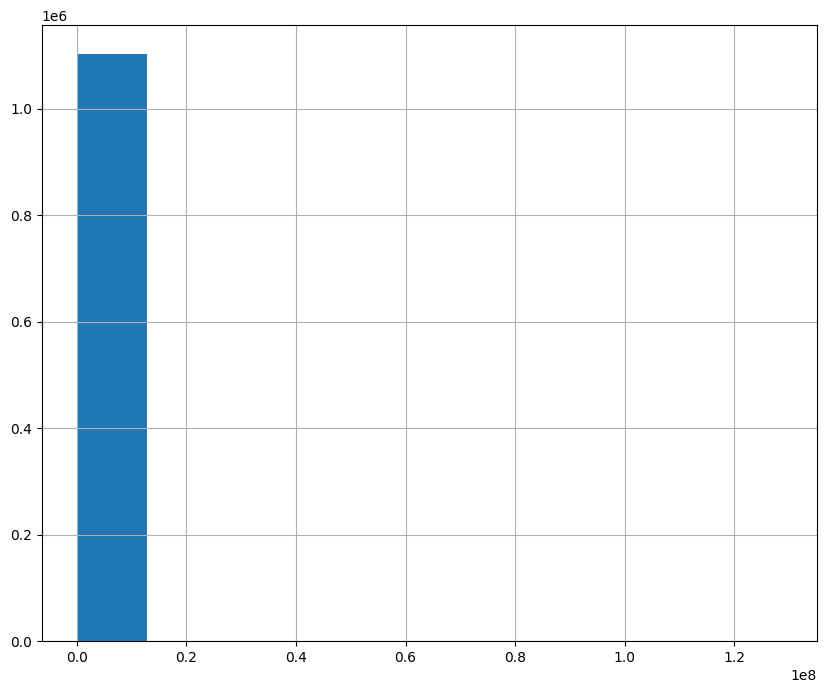

In [26]:
df['ORDER_AMOUNT'].hist(figsize=(10,8))
plt.show()

In [27]:
def plot_hist_box( df, title):
    print(title)
    print("Skew : ", round(df["ORDER_AMOUNT"].skew(), 2))
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)  # No.of Rows is 1 number of columns is 2 and index is 1
    df["ORDER_AMOUNT"].hist(bins=10, grid=False) # Shows the histogram in first graph
    plt.ylabel = "Count"
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df["ORDER_AMOUNT"])  # Shows the box plot in sencond graph.
    plt.show()

ORDER_AMOUNT
Skew :  261.24


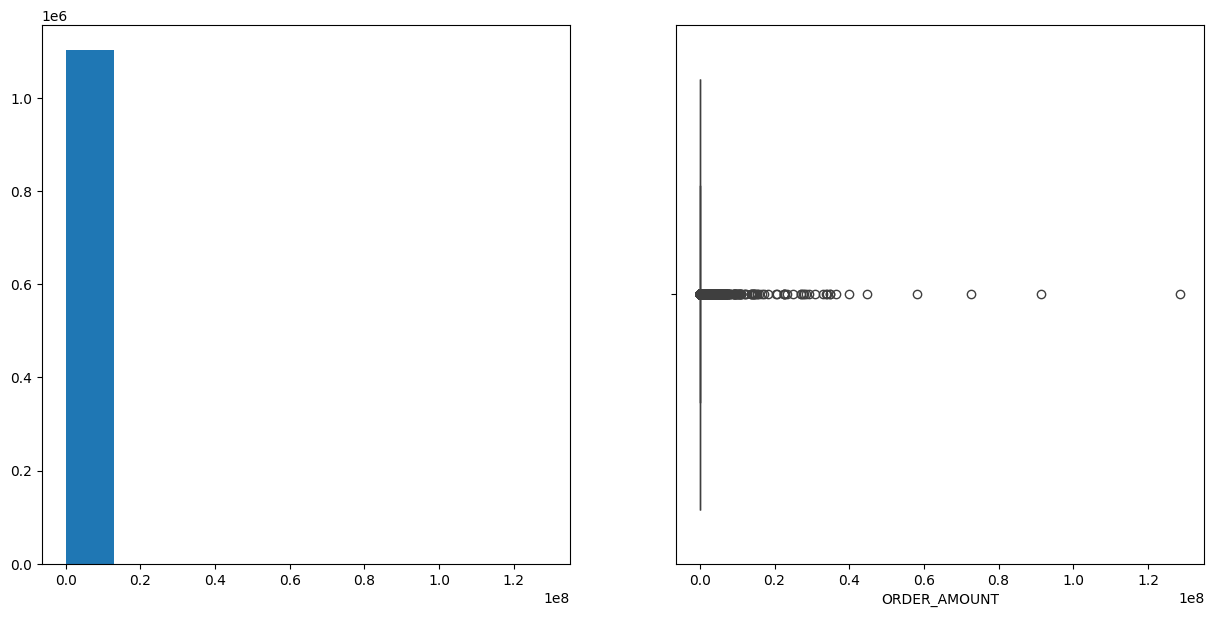

In [28]:
plot_hist_box(df, "ORDER_AMOUNT")

In [29]:
df['uniue_cust_id'] = df['CUSTOMER_NUMBER'] + df['COMPANY_CODE']

In [30]:
df.to_csv('./cust_amt_pred_prod_sample/data/Preprocessed_data.csv', index=False)